# imports

In [1]:
import ceilopy.ceilolab as cp
import ceilopy.products.cl51_cloud_prod_lev1_v1p3 as cl51l1v1p3

# optional ... use a reporter

In [2]:
import productomator.lab as prolab

In [3]:
reporter = prolab.Reporter('Cl51CloudProd', 
                           # log_folder='/export/htelg/tmp/', 
                           reporting_frequency=(6,'h'))

start time: 2024-01-12 15:08:35.392002


# generate the instance that takes care of processing everything

In [4]:
p2fl_in = '/nfs/grad/Inst/Ceil/SURFRAD/'
p2fl_out = '/nfs/grad/surfrad/ceilometer/cl51_cloud_prod_lev1/v{version}'
p2fl_quicklooks = '/nfs/grad/surfrad/quicklooks/ceilometer/cl51_cloud_prod_lev1/v{version}'
cpp = cl51l1v1p3.Cl51CloudProdProcessor_v1p3(
    ignore=['plots'],
    p2fl_in=p2fl_in,
    p2fl_out=p2fl_out,
    p2fl_quicklooks=p2fl_quicklooks,  # comment out if not desired
    reporter=reporter,  # comment out if not desired
)

# the workplan

The workplan shows all the files that need processing. It generates the path to all output files based on all input files. When output files exist the line is removed from the workplan. If you want you can change the workplan, e.g. like this:

In [5]:
cpp.workplan = cpp.workplan.truncate(
    '2019-01-01',
    pd.Timestamp.now() - pd.to_timedelta(12, 'd')
)

In [7]:
cpp.workplan.iloc[0]

path2raw           /nfs/grad/Inst/Ceil/SURFRAD/TBL/bl/L2_06610_20...
site                                                             tbl
date                                             2019-01-01 00:00:00
path2fn_out        /nfs/grad/surfrad/ceilometer/cl51_cloud_prod_l...
path2quicklooks    /nfs/grad/surfrad/quicklooks/ceilometer/cl51_c...
serial_no                                               201901010000
path2althist_l2    /nfs/grad/Inst/Ceil/SURFRAD/TBL/hist/201901_CE...
path2althist_l3    /nfs/grad/Inst/Ceil/SURFRAD/TBL/hist/201901_CE...
Name: 2019-01-01 00:00:00, dtype: object

In [11]:
cpp.workplan.iloc[0].path2althist_l3

PosixPath('/nfs/grad/Inst/Ceil/SURFRAD/TBL/hist/201901_CEILOMETER_1_LEVEL_3_DEFAULT_01.his')

# process

The process method will try to process all the files in the workplan. By setting error handling kwargs errors can be skiped (return). Information about the encountered errors is returned.

In [ ]:
out = cpp.process(generate_missing_folders=True, 
              error_handling='return',
              error_handling_missing_level3 = 'return',
             )

In [ ]:
len(out['errors'])

# The resulting files

In [2]:
fn = '/nfs/grad/surfrad/ceilometer/cl51_cloud_prod_lev1/v1.3.2/fpk/2020/fpk.cl51.cloud_prod.20201115.nc'
ds = xr.open_dataset(fn)

In [13]:
ds

<xarray.Dataset>
Dimensions:                  (time: 1440, range: 1540, cloud_layer: 3)
Coordinates:
  * time                     (time) datetime64[ns] 2020-11-15 ... 2020-11-15T...
  * range                    (range) int64 10 20 30 40 ... 15380 15390 15400
  * cloud_layer              (cloud_layer) int8 1 2 3
Data variables:
    backscatter_profile      (time, range) float32 ...
    cloud_status             (time) float32 ...
    cloud_data               (time, cloud_layer) float32 ...
    instrumen_reported_time  (time) datetime64[ns] ...
Attributes:
    title:           Ceilometer cloud product
    version:         1.3.2
    institution:     NOAA/GML/GRAD
    author:          hagen.telg@noaa.gov
    source:          Vaisala CL51 ceilometer
    serial_number:   p0510654
    input_files:     202011_CEILOMETER_1_LEVEL_2_15.his, 202011_CEILOMETER_1_...
    Conventions:     CF-1.8
    comments:        The 'time' coordinate has been re-indexed to the nearest...
    site_name:       fpk
    site_latitude:   nan
    site_longitude:  nan

In [3]:
cdi = cp.CeilometerData(ds)

(<Figure size 2150.4x1152 with 4 Axes>,
 array([<Axes: title={'center': '2020-11-15 - fpk - L51 ceilometer backscatter (top), cloud-layers (bottom)'}, xlabel='time', ylabel='Distance from ground [m]'>,
        <Axes: ylabel='Range-corrected backscattering'>,
        <Axes: xlabel='Houre of day [UTC]', ylabel='Cloud base heights. [m]'>,
        <Axes: >], dtype=object),
 <matplotlib.collections.QuadMesh at 0x7f3a9ab15d20>)

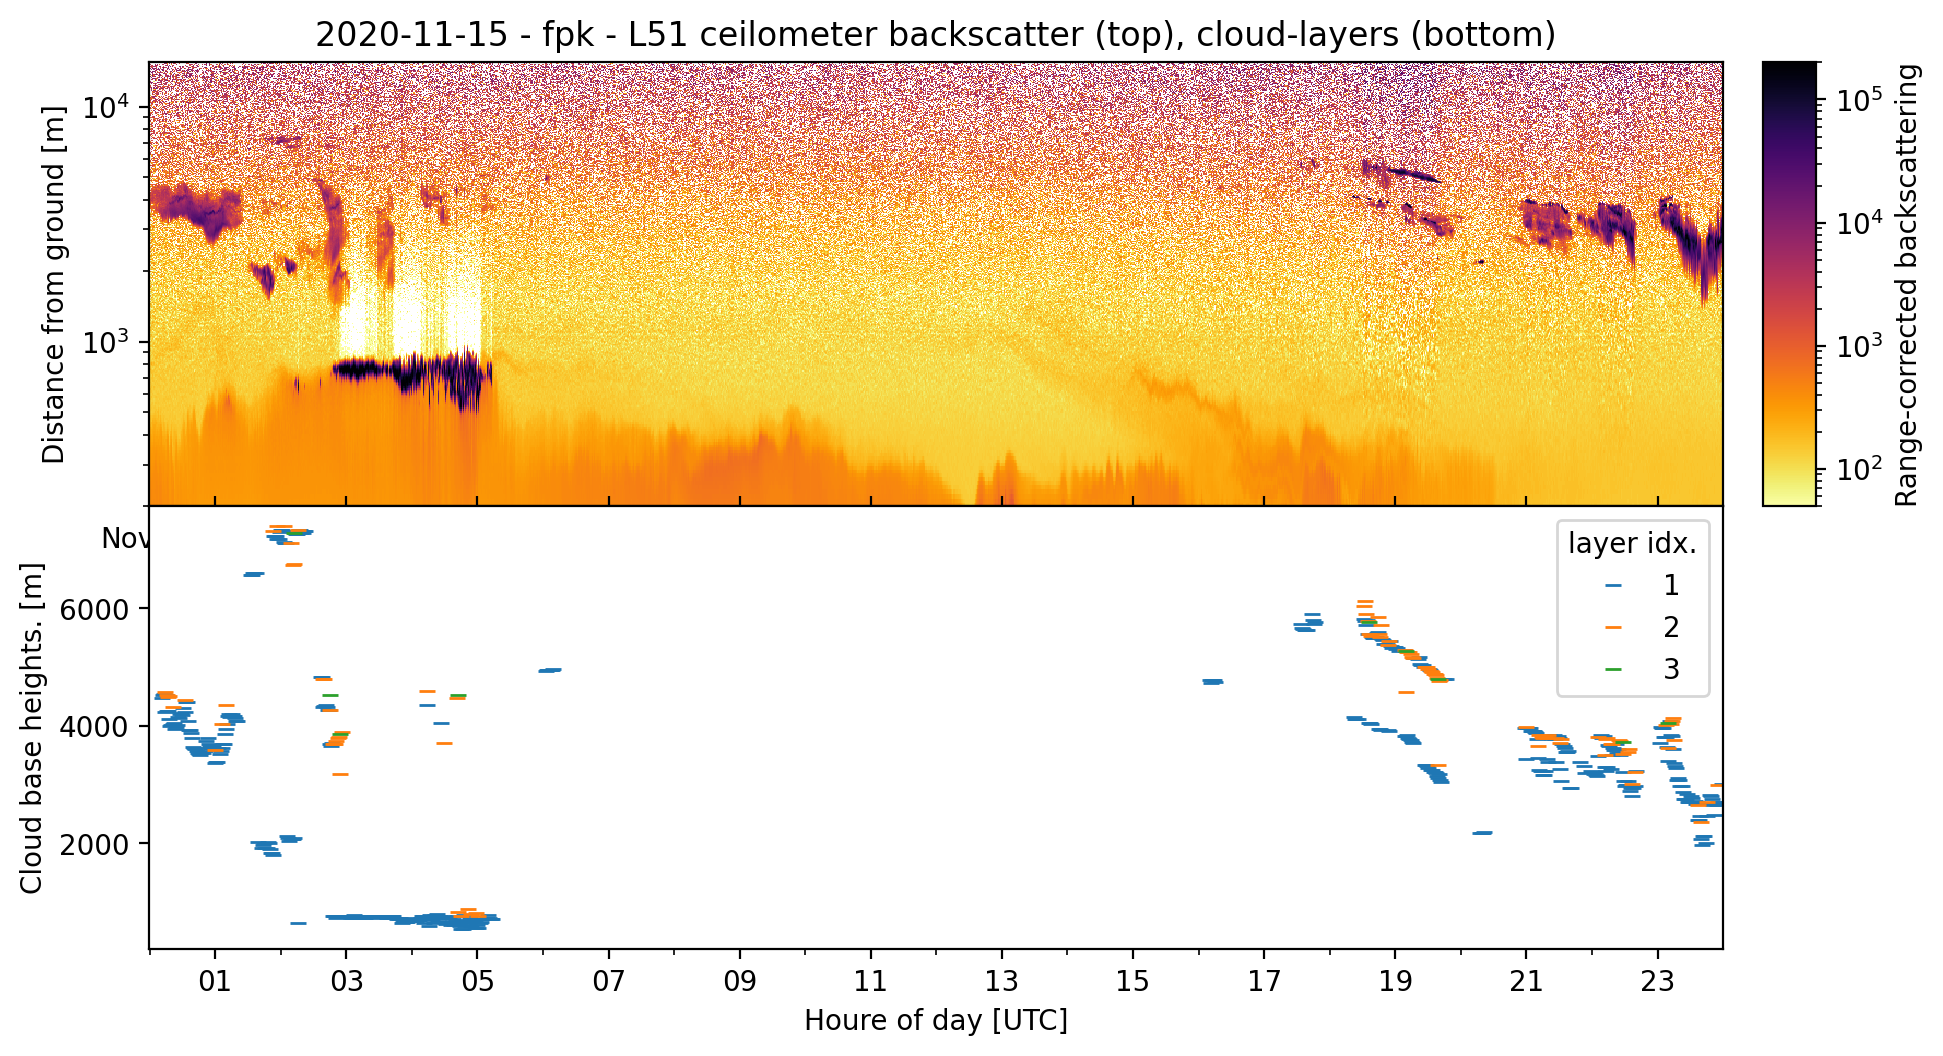

In [4]:
cdi.plot_quicklooks()